In [1]:
import pandas as pd

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from libpysal.weights import KNN
from spreg import GM_Lag
from statsmodels.tsa.api import VAR

In [88]:
file_path = r"C:\Users\JUMIA-4237\Desktop\Thesisoption\arrest_SPQ.csv"

In [89]:
SH = pd.read_csv(file_path)

In [90]:
SH.head(3)

,Type,Date,Part of a policing operation,Latitude,Longitude,Object of search,Outcome,Anything to threaten or harm anyone,Articles for use in criminal damage,Controlled drugs,Evidence of offences under the Act,Firearms,Offensive weapons,Stolen goods
0,Person search,2021-03-31T23:09:00+00:00,False,51.418969,-0.147822,Controlled drugs,Arrest,0,0,1,0,0,0,0
1,Person search,2021-03-31T23:17:00+00:00,False,51.498727,-0.105172,Evidence of offences under the Act,Arrest,0,0,0,1,0,0,0
2,Person and Vehicle search,2021-03-31T23:25:00+00:00,False,51.530467,-0.388379,Controlled drugs,Arrest,0,0,1,0,0,0,0


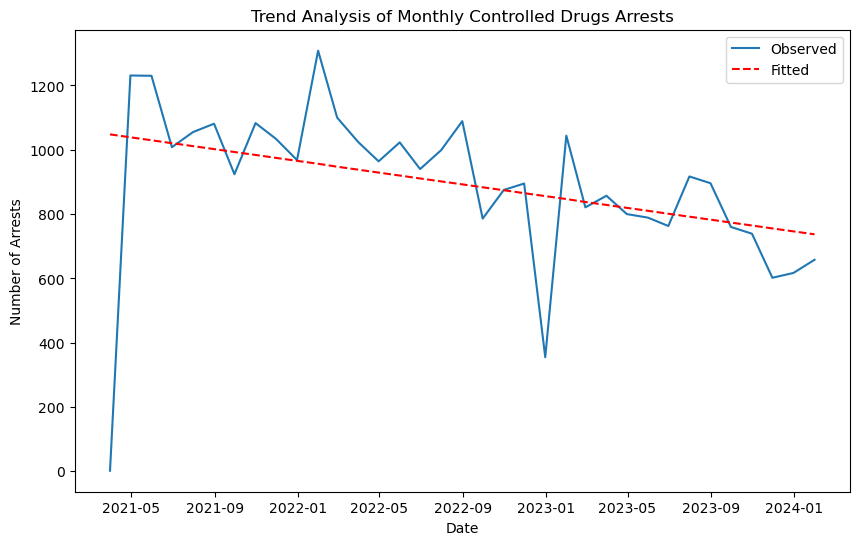

Slope of the regression line: -9.140896358543417


In [83]:
SH['Date'] = pd.to_datetime(SH['Date'])
SH.set_index('Date', inplace=True)

controlled_drugs = SH[SH['Object of search'] == 'Controlled drugs']

monthly_counts = controlled_drugs.resample('M').size().reset_index(name='Arrests')

monthly_counts['Time'] = np.arange(len(monthly_counts))

X = monthly_counts[['Time']]
y = monthly_counts['Arrests']

linear_model = LinearRegression()
linear_model.fit(X, y)

monthly_counts['Fitted'] = linear_model.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(monthly_counts['Date'], monthly_counts['Arrests'], label='Observed')
plt.plot(monthly_counts['Date'], monthly_counts['Fitted'], linestyle='--', color='red', label='Fitted')
plt.xlabel('Date')
plt.ylabel('Number of Arrests')
plt.title('Trend Analysis of Monthly Controlled Drugs Arrests')
plt.legend()
plt.show()

print(f"Slope of the regression line: {linear_model.coef_[0]}")

In [74]:
SH['Date'] = pd.to_datetime(SH['Date'])
SH.set_index('Date', inplace=True)

controlled_drugs = SH[SH['Object of search'] == 'Controlled drugs']

monthly_counts = controlled_drugs.resample('M').size().reset_index(name='Arrests')

monthly_counts.set_index('Date', inplace=True)

decomposition = seasonal_decompose(monthly_counts['Arrests'], model='additive')

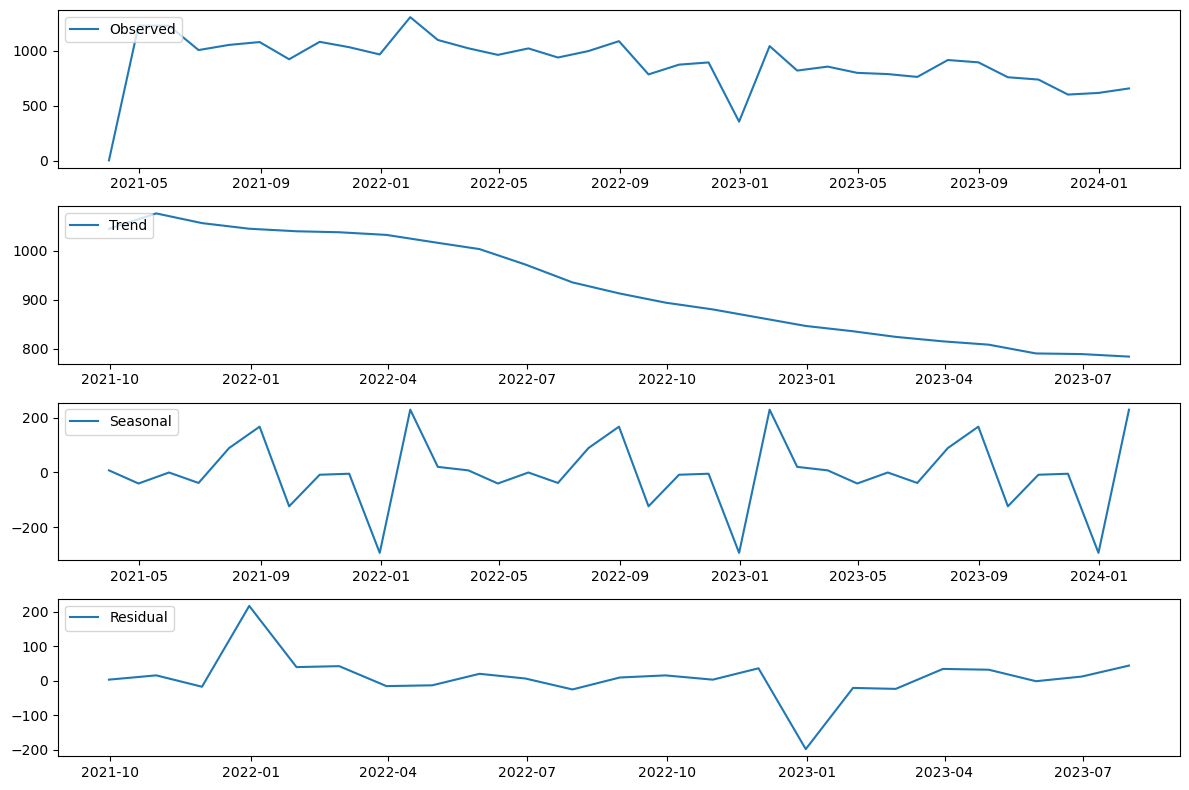

In [75]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [84]:
model = ARIMA(monthly_counts['Arrests'], order=(1, 1, 1))
arima_result = model.fit()

In [85]:
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Arrests   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -235.805
Date:                Sun, 09 Jun 2024   AIC                            477.610
Time:                        13:33:01   BIC                            482.189
Sample:                             0   HQIC                           479.172
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1486      0.147     -1.009      0.313      -0.437       0.140
ma.L1         -0.7411      0.204     -3.639      0.000      -1.140      -0.342
sigma2      5.863e+04   9396.559      6.240      0.0

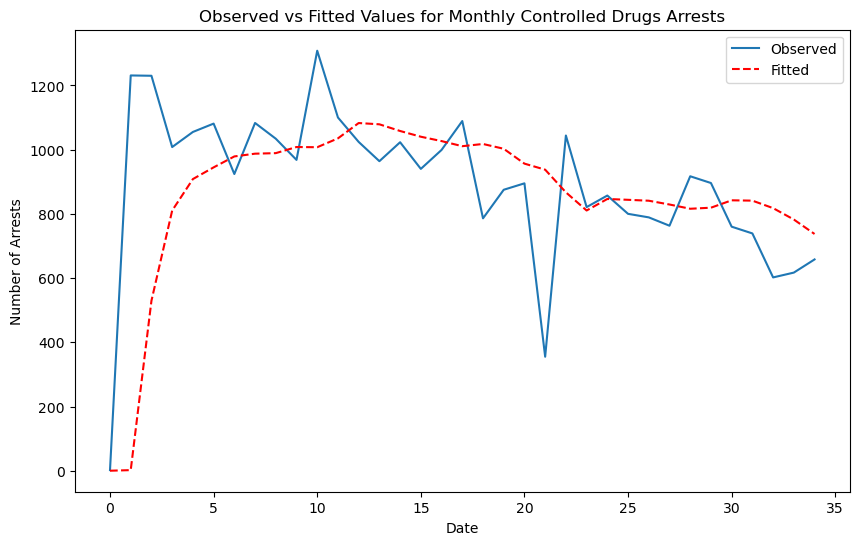

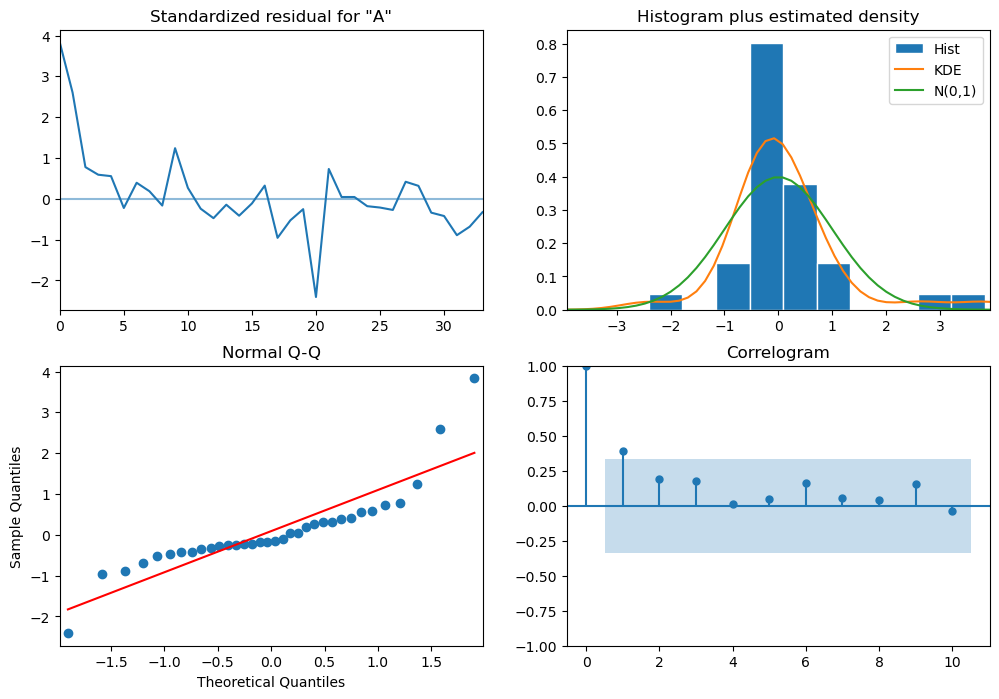

In [86]:
monthly_counts['Fitted'] = arima_result.fittedvalues

plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts['Arrests'], label='Observed')
plt.plot(monthly_counts.index, monthly_counts['Fitted'], linestyle='--', color='red', label='Fitted')
plt.xlabel('Date')
plt.ylabel('Number of Arrests')
plt.title('Observed vs Fitted Values for Monthly Controlled Drugs Arrests')
plt.legend()
plt.show()

arima_result.plot_diagnostics(figsize=(12, 8))
plt.show()

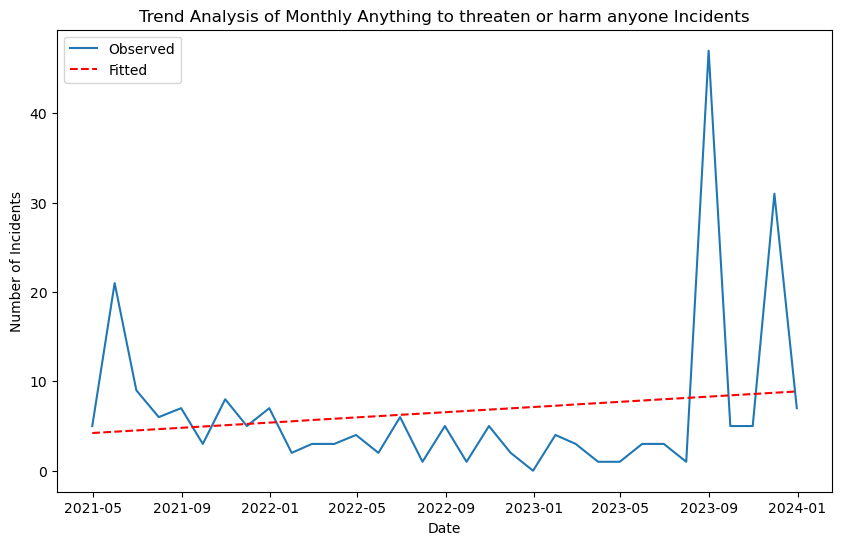

Slope of the regression line for Anything to threaten or harm anyone: 0.14538770053475936


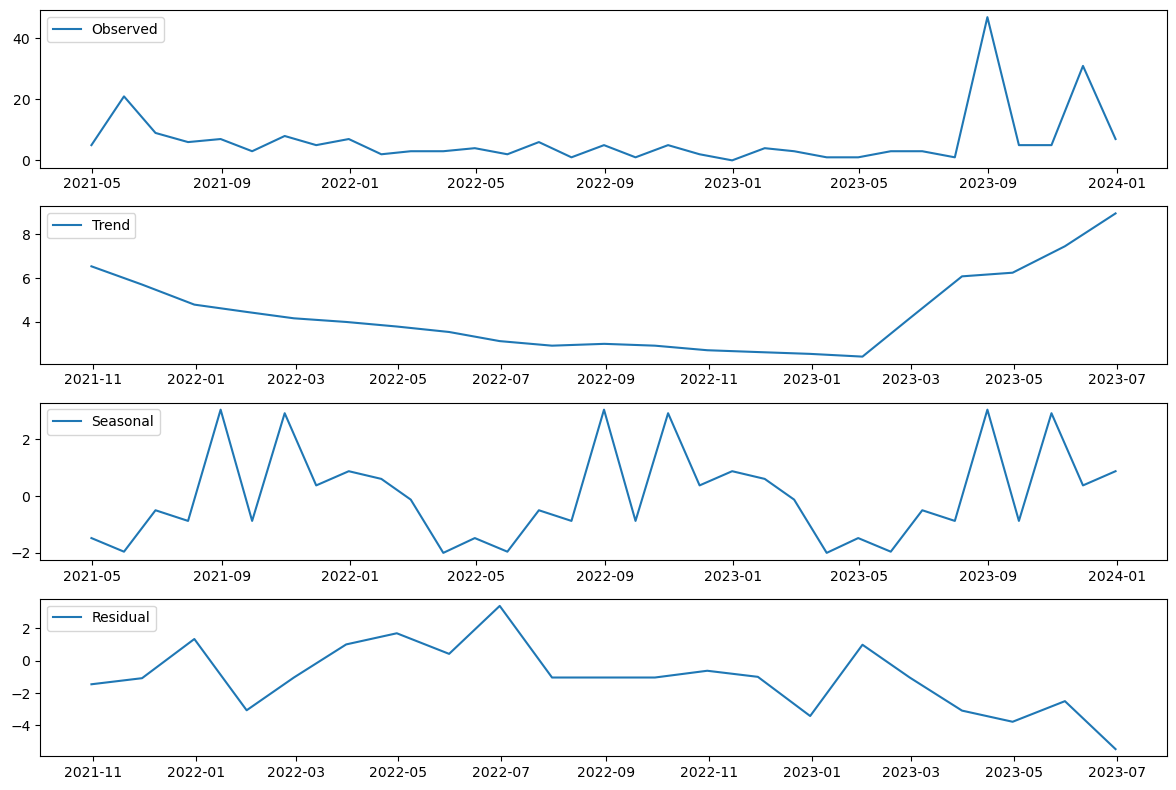

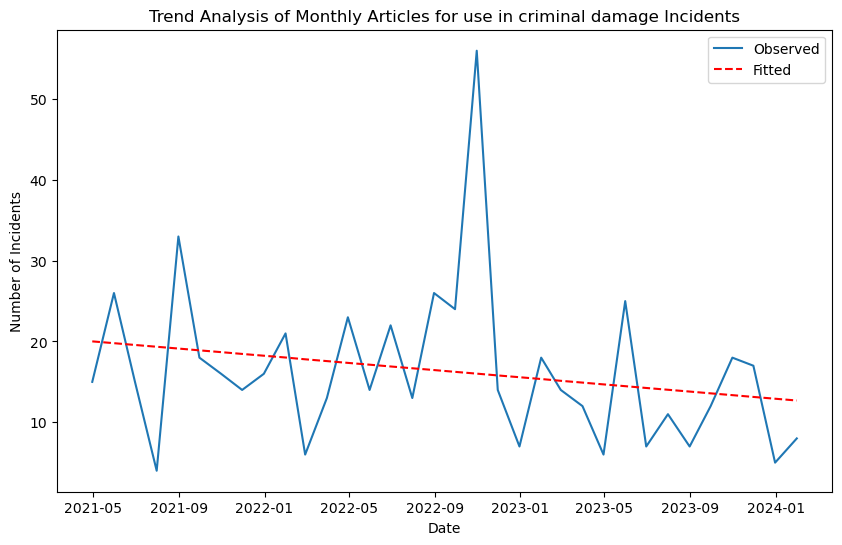

Slope of the regression line for Articles for use in criminal damage: -0.22184873949579825


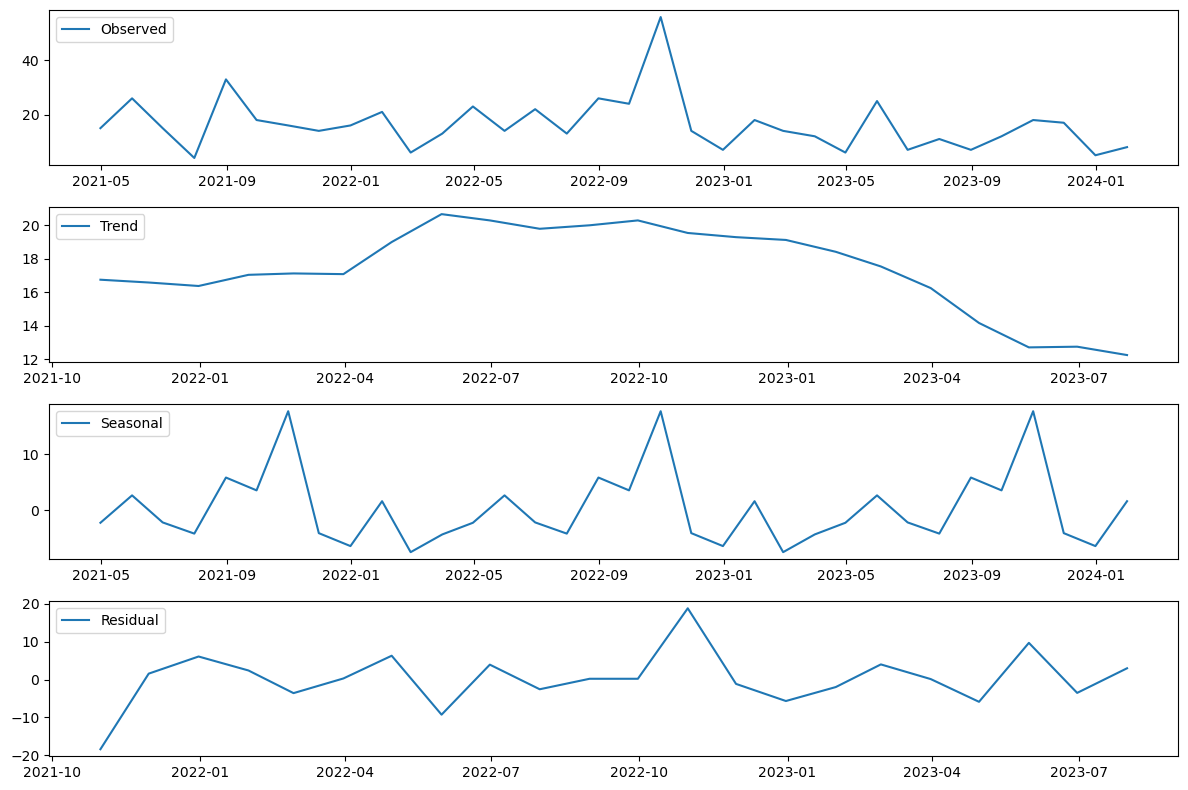

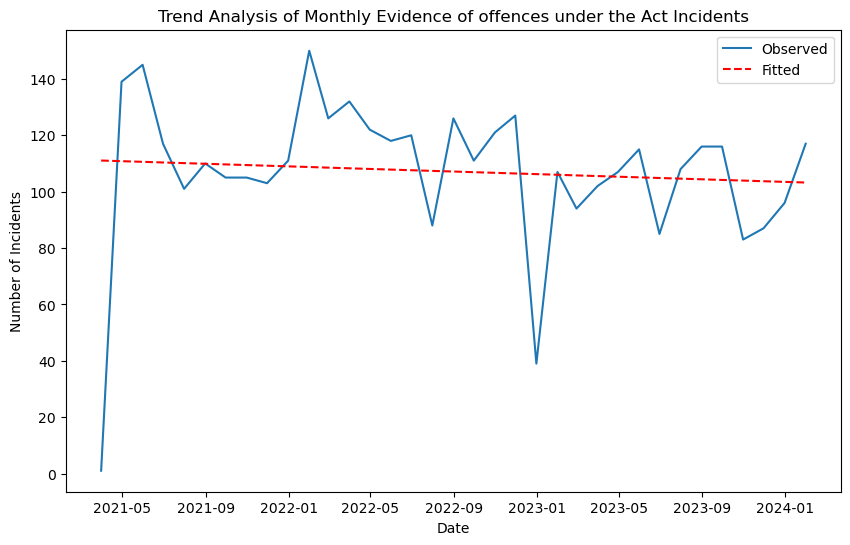

Slope of the regression line for Evidence of offences under the Act: -0.22941176470588248


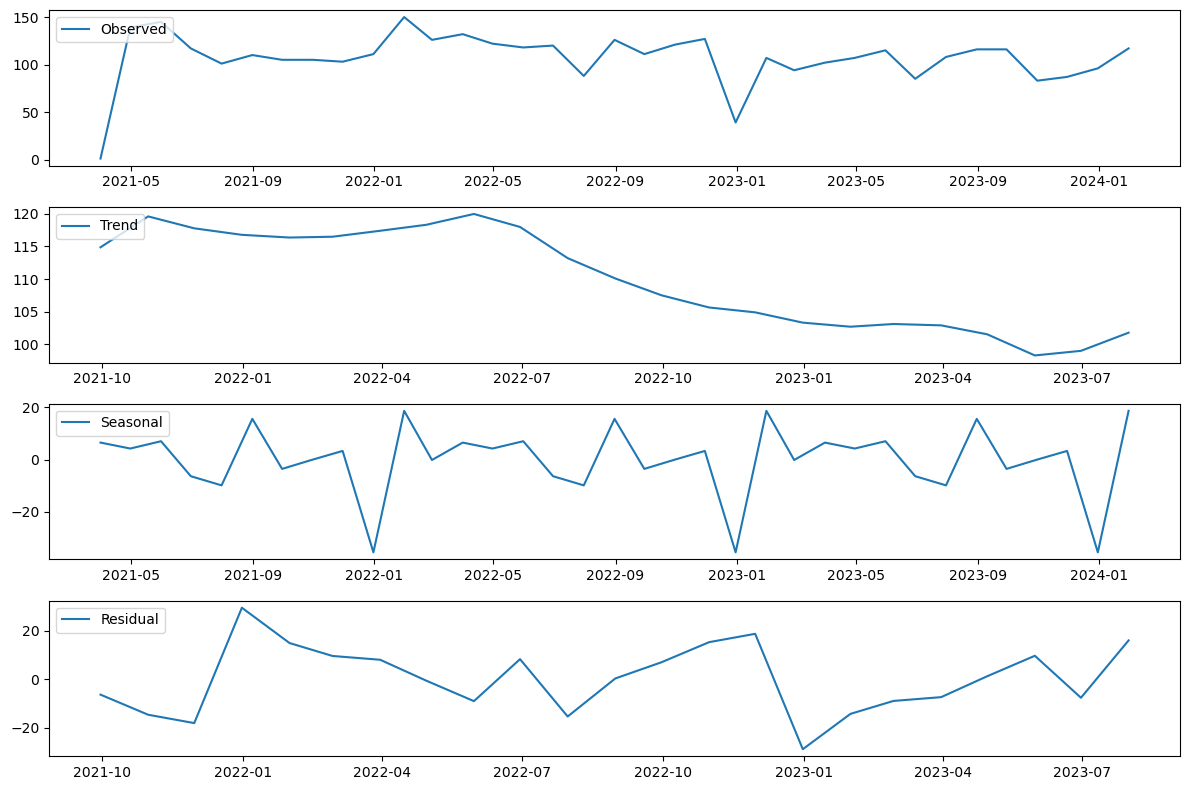

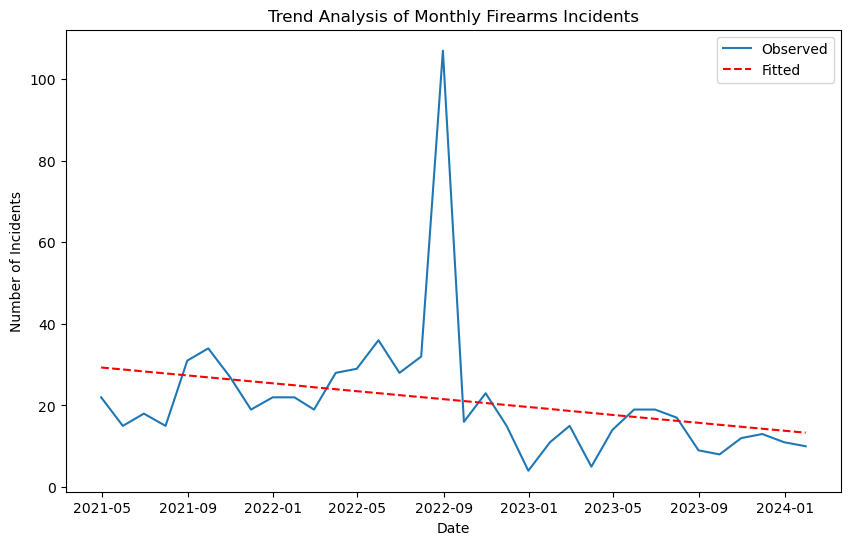

Slope of the regression line for Firearms: -0.4844919786096256


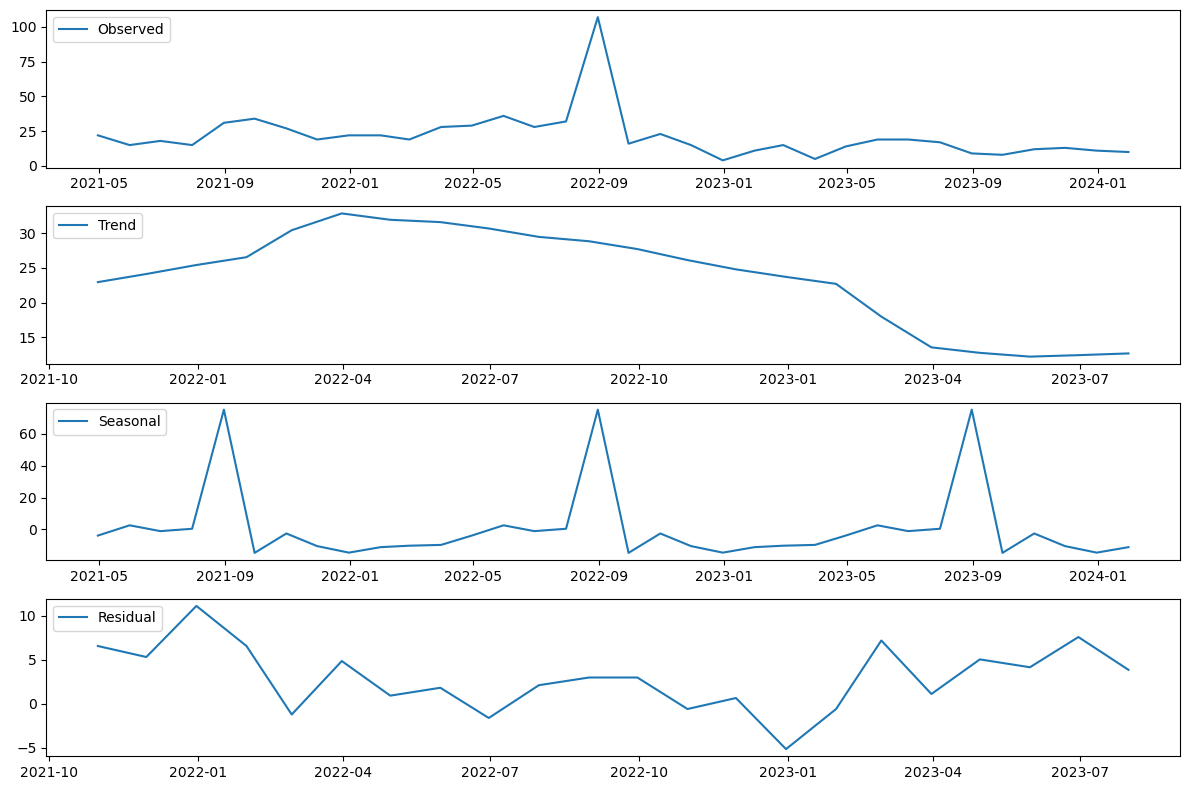

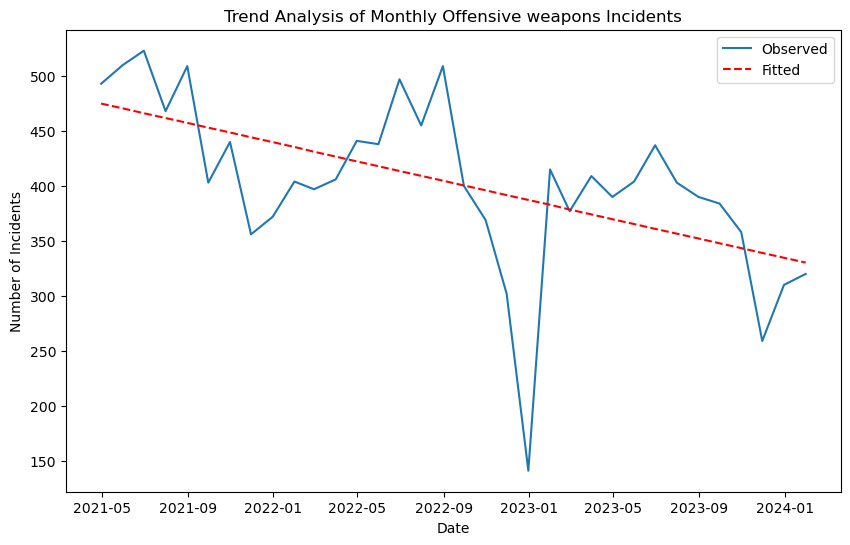

Slope of the regression line for Offensive weapons: -4.382123758594346


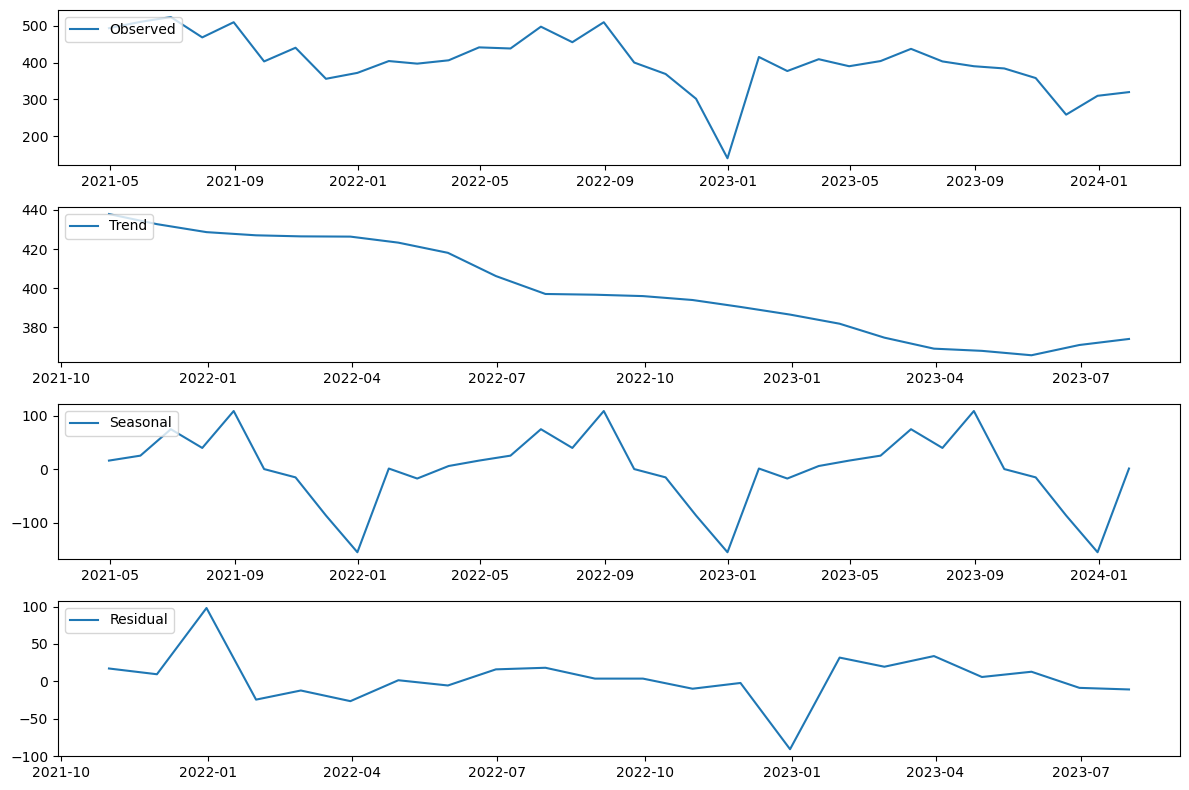

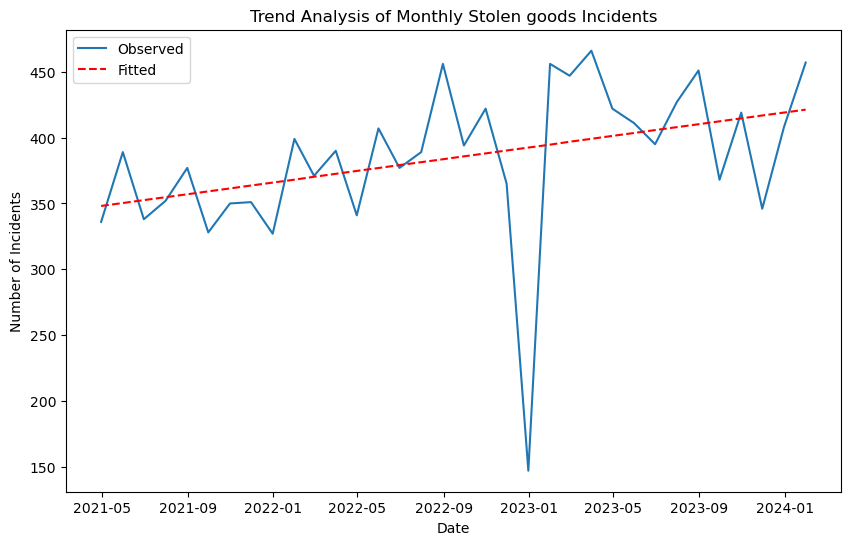

Slope of the regression line for Stolen goods: 2.2165011459129103


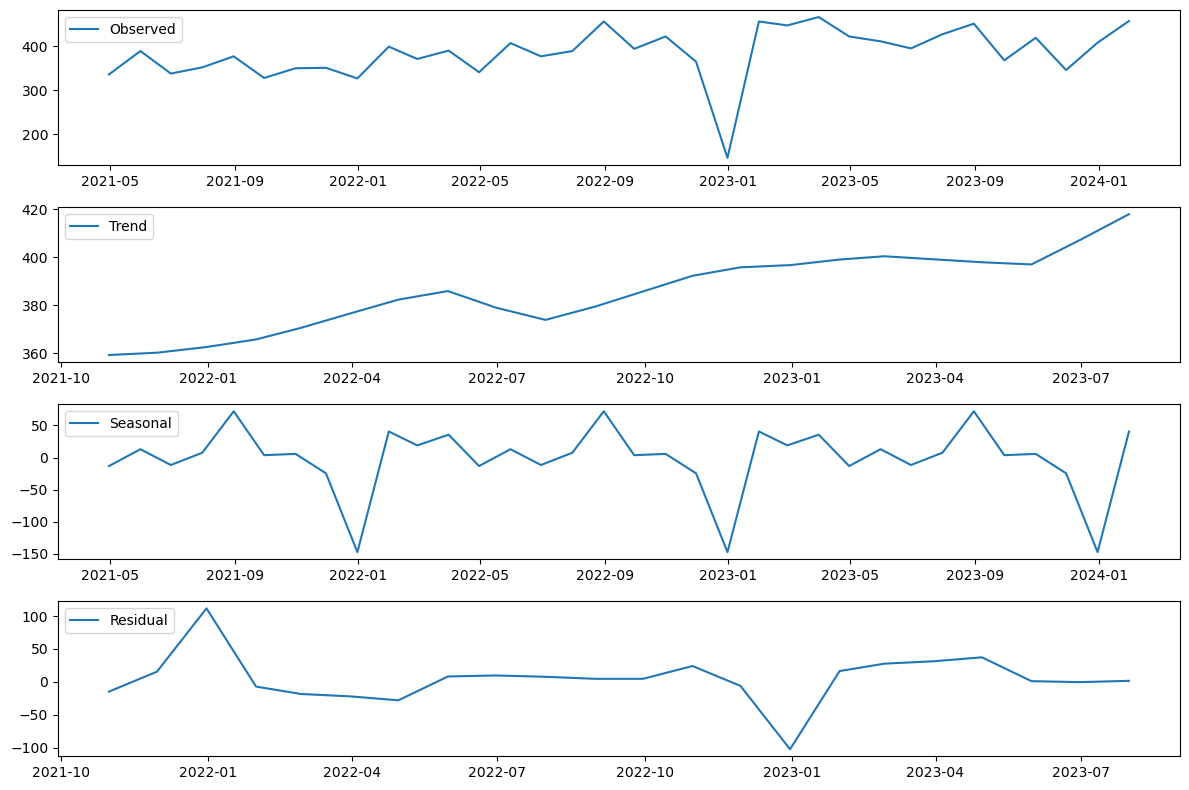

In [91]:
SH['Date'] = pd.to_datetime(SH['Date'])
SH.set_index('Date', inplace=True)

# List of columns to analyze
columns_to_analyze = [
    'Anything to threaten or harm anyone',
    'Articles for use in criminal damage',
    'Evidence of offences under the Act',
    'Firearms',
    'Offensive weapons',
    'Stolen goods'
]

for column in columns_to_analyze:
    filtered_data = SH[SH[column] == 1]
    
    monthly_counts = filtered_data.resample('M').size().reset_index(name='Counts')
    
    monthly_counts['Time'] = np.arange(len(monthly_counts))
    
    X = monthly_counts[['Time']]
    y = monthly_counts['Counts']
    
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    
    monthly_counts['Fitted'] = linear_model.predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_counts['Date'], monthly_counts['Counts'], label='Observed')
    plt.plot(monthly_counts['Date'], monthly_counts['Fitted'], linestyle='--', color='red', label='Fitted')
    plt.xlabel('Date')
    plt.ylabel('Number of Incidents')
    plt.title(f'Trend Analysis of Monthly {column} Incidents')
    plt.legend()
    plt.show()
    
    print(f"Slope of the regression line for {column}: {linear_model.coef_[0]}")
    
    monthly_counts.set_index('Date', inplace=True)
    
    decomposition = seasonal_decompose(monthly_counts['Counts'], model='additive')
    
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
